In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#reading the  dataset
comments=pd.read_csv(r'C:\Users\Asus\Desktop\python101\1-Youtube Text Data Analysis/GBcomments.csv',error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [21]:
comments.head(10)

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
5  jt2OHQh0HoQ  Keep calm and buy iphone 8 Keep calm and buy i...      0   
6  jt2OHQh0HoQ      i am a big fan of youtube and u !!!!!!!!!!!!!      0   
7  jt2OHQh0HoQ  You will never find Losers who line up and pay...      0   
8  jt2OHQh0HoQ  *APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...      0   
9  jt2OHQh0HoQ  I'm only here to see Emma, I love her so much!...      0   

   replies  
0        0  
1        0  
2        0  
3        0  
4        0  
5        0  
6        0  
7        0  
8        0  
9        0

# Sentiment Analysis Of Youtube_Comments

In [22]:
!pip install textblob

In [23]:
from textblob import TextBlob

In [24]:
TextBlob('To be there with a samsung phone\n😂😂😂').sentiment.polarity

0.0

In [25]:
TextBlob('Its more accurate to call it the M+ (1000) be..').sentiment.polarity

0.45000000000000007

In [26]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [27]:
comments.dropna(inplace=True)

In [29]:
polarity=[] # list which will contain the polarity of the comments

for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [31]:
comments['polarity']=polarity

In [32]:
comments.head(20)

video_id                                       comment_text  likes  \
0   jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1   jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2   jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3   jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4   jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
5   jt2OHQh0HoQ  Keep calm and buy iphone 8 Keep calm and buy i...      0   
6   jt2OHQh0HoQ      i am a big fan of youtube and u !!!!!!!!!!!!!      0   
7   jt2OHQh0HoQ  You will never find Losers who line up and pay...      0   
8   jt2OHQh0HoQ  *APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...      0   
9   jt2OHQh0HoQ  I'm only here to see Emma, I love her so much!...      0   
10  jt2OHQh0HoQ           Mom said: Just one more video before bed      0   
11  jt2OHQh0HoQ                           what is the song?? 39:20      0   
12  jt2OHQh0HoQ  I started crying at 49:01 when Emma's EP showe...      0   
13  jt2OHQh0HoQ  3 years late on wireless charging, 3 years lat...      0   
14  jt2OHQh0HoQ                             more one before to bed      0   
15  jt2OHQh0HoQ                subscribe me if you love your mummy      0   
16  jt2OHQh0HoQ  They really just took the samsung s8 and named...      0   
17  jt2OHQh0HoQ  so if someone has a twin sibling both can unlo...      0   
18  jt2OHQh0HoQ             For god sake its better than my ps4pro      0   
19  jt2OHQh0HoQ     7mp cam what kind of standard is this in 2017?      0   

    replies  polarity  
0         0  0.450000  
1         0  0.000000  
2         0  0.000000  
3         0  0.000000  
4         0  1.000000  
5         0  0.300000  
6         0  0.000000  
7         0 -0.100000  
8         0  0.028571  
9         0  0.500000  
10        0  0.500000  
11        0  0.000000  
12        0  0.300000  
13        0  0.026563  
14        0  0.500000  
15        0  0.500000  
16        0  0.200000  
17        0  0.250000  
18        0  0.500000  
19        0  0.300000

#  LET'S PERFORM EDA FOR THE POSITIVE SENTENCE

In [33]:
comments_positive=comments[comments['polarity']==1]

In [34]:
comments_positive.shape

(20400, 5)

In [35]:
comments_positive.head()

video_id                                       comment_text  likes  \
4    jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
26   jt2OHQh0HoQ            The best thing to ever happen to iPhone      0   
80   jt2OHQh0HoQ  Apple is always awesome \n\nhttps://youtu.be/r...      0   
158  YPVcg45W0z4  das a lot of edditing you have done there ... ...      0   
175  YPVcg45W0z4                        Welcome to the Scandiworld!      0   

     replies  polarity  
4          0       1.0  
26         2       1.0  
80         1       1.0  
158        0       1.0  
175        0       1.0

In [37]:
!pip install wordcloud

In [38]:
from wordcloud import WordCloud,STOPWORDS

In [39]:
stopwords=set(STOPWORDS)

In [40]:
total_comments=' '.join(comments_positive['comment_text'])

In [42]:
wordcloud=WordCloud(width=2000,height=1000,stopwords=stopwords).generate(total_comments)

(-0.5, 1999.5, 999.5, -0.5)

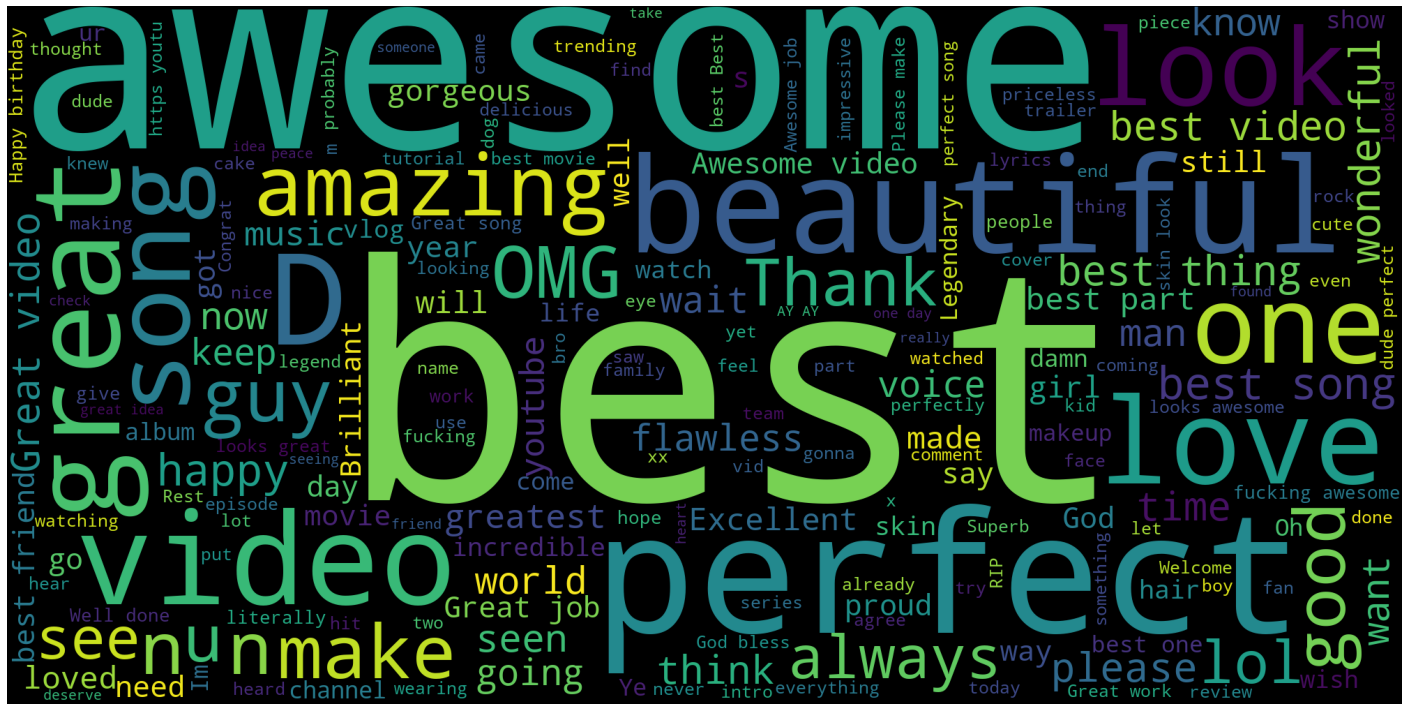

In [43]:
plt.figure(figsize=(25,15))
plt.imshow(wordcloud)
plt.axis('off')

#  LET'S PERFORM EDA FOR THE NEGATIVE SENTENCE

In [44]:
comments_negative=comments[comments['polarity']==-1]

In [45]:
total_comments=' '.join(comments_negative['comment_text'])

In [47]:
wordcloud=WordCloud(width=2000,height=1000,stopwords=stopwords).generate(total_comments)

(-0.5, 1999.5, 999.5, -0.5)

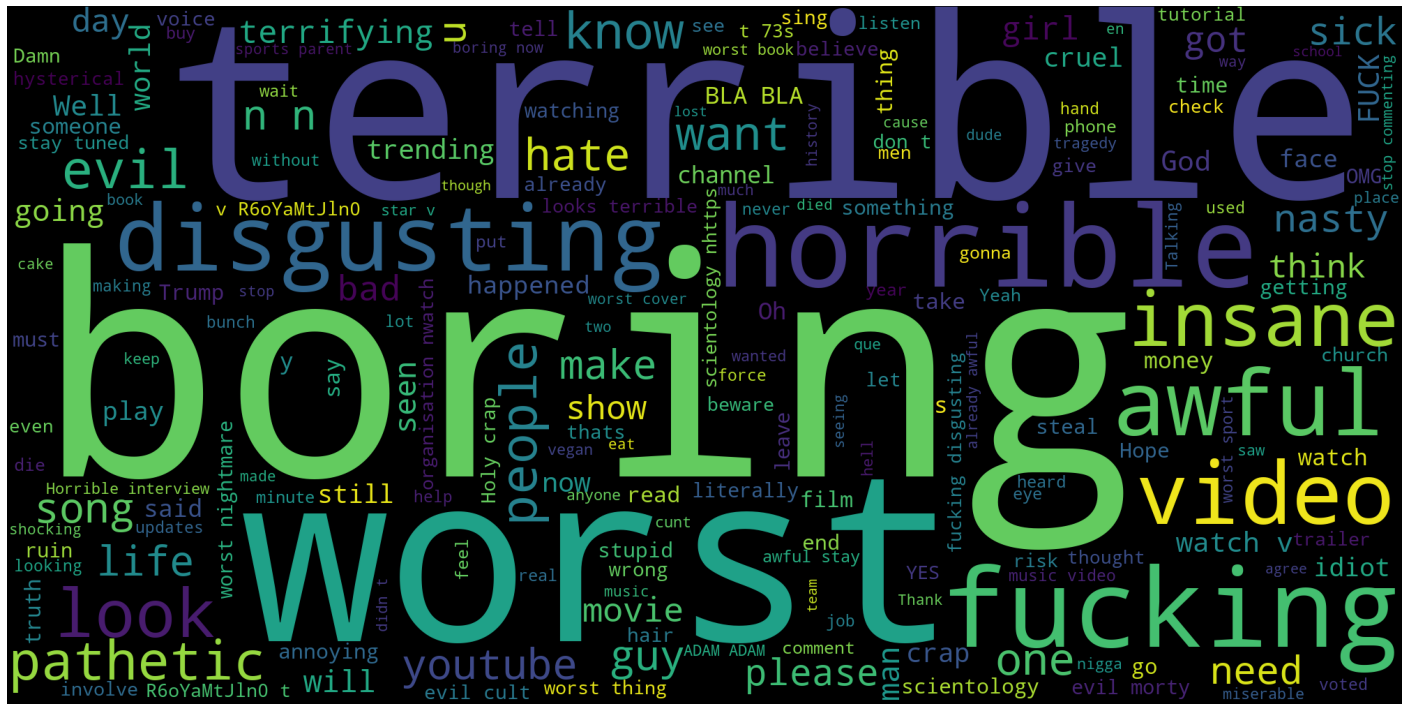

In [48]:
plt.figure(figsize=(25,15))
plt.imshow(wordcloud)
plt.axis('off')

# ANALYSING TRENDING TAGS AND VIEWS ON YOUTUBE

In [49]:
videos=pd.read_csv(r'C:\Users\Asus\Desktop\python101\1-Youtube Text Data Analysis/USvideos.csv',error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [50]:
videos.head(10)

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   
5  cMKX2tE5Luk    The Disaster Artist | Official Trailer HD | A24   
6  8wNr-NQImFg       The Check In: HUD, Ben Carson and Hurricanes   
7  _HTXMhKWqnA                   iPhone X Impressions & Hands On!   
8  _ANP3HR1jsM                         ATTACKED BY A POLICE DOG!!   
9  zgLtEob6X-Q                 Honest Trailers - The Mummy (2017)   

                 channel_title  category_id  \
0             Logan Paul Vlogs           24   
1                        Apple           28   
2                    PewDiePie           22   
3                    The Verge           28   
4                   jacksfilms           23   
5                          A24            1   
6  Late Night with Seth Meyers           23   
7             Marques Brownlee           28   
8             RomanAtwoodVlogs           22   
9               Screen Junkies            1   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   
5  a24|a24 films|a24 trailers|independent films|t...  1311445   34507   
6  Late night|Seth Meyers|check in|hud|Ben Carson...   666169    9985   
7  iPhone X|iphone x|iphone 10|iPhone X impressio...  1728614   74062   
8  Roman Atwood|Roman|Atwood|roman atwood vlogs|f...  1338533   69687   
9  screenjunkies|screen junkies|screenjunkies new...  1056891   29943   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   
5       544           3040  https://i.ytimg.com/vi/cMKX2tE5Luk/default.jpg   
6       297           1071  https://i.ytimg.com/vi/8wNr-NQImFg/default.jpg   
7      2180          15297  https://i.ytimg.com/vi/_HTXMhKWqnA/default.jpg   
8       678           5643  https://i.ytimg.com/vi/_ANP3HR1jsM/default.jpg   
9       878           4046  https://i.ytimg.com/vi/zgLtEob6X-Q/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09  
5  13.09  
6  13.09  
7  13.09  
8  13.09  
9  13.09

In [51]:
tags_complete=' '.join(videos['tags'])

In [52]:
tags_complete

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

In [53]:
import re

In [54]:
tags=re.sub('[^a-zA-Z]',' ',tags_complete)

In [55]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [56]:
tags=re.sub(' +',' ',tags)

In [58]:
wordcloud=WordCloud(width=2000,height=1000,stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 1999.5, 999.5, -0.5)

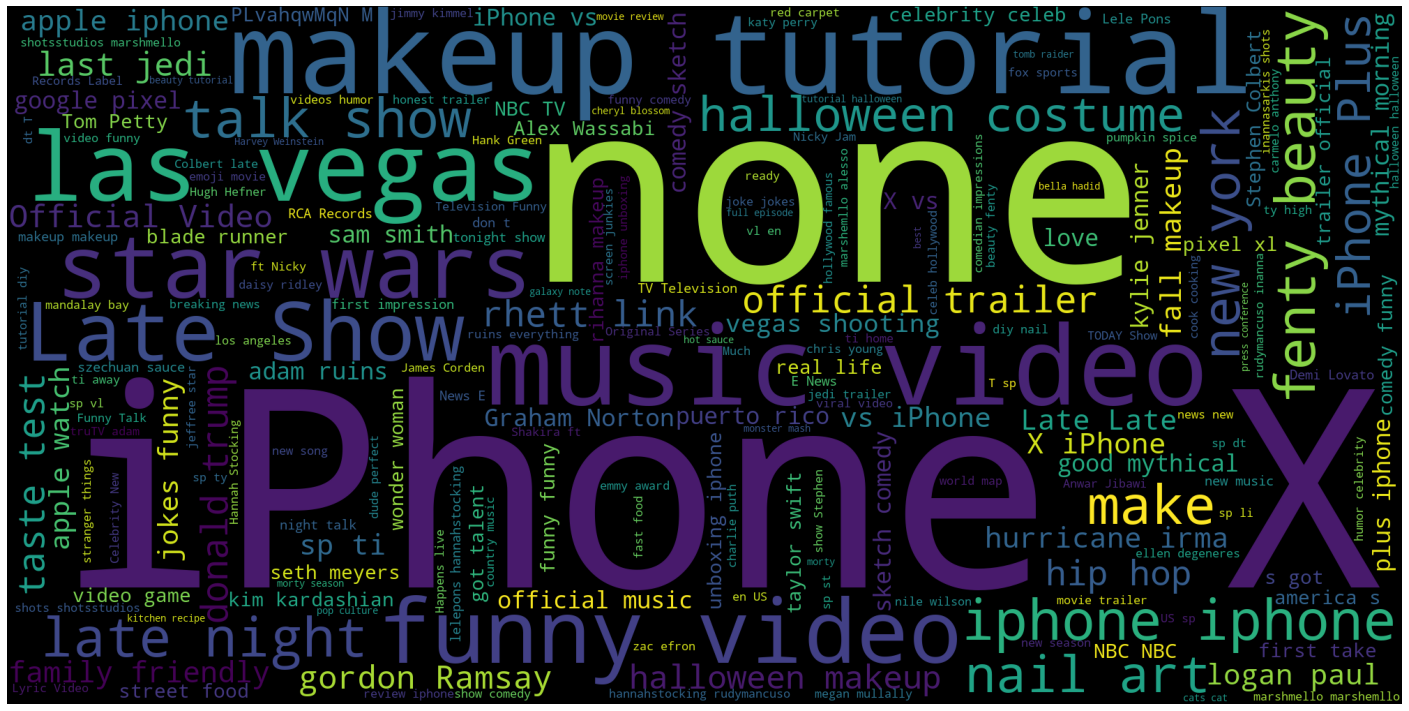

In [59]:
plt.figure(figsize=(25,15))
plt.imshow(wordcloud)
plt.axis('off')

# Performing Analysis on likes, Dislikes, Views and how they are corelated with each other ???


#### As quite obvious the number of likes have very strong relation with views

Text(0.5, 1.0, 'Regression plot With respect to Views and Likes')

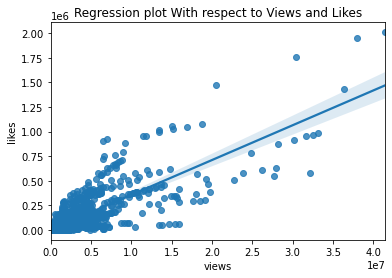

In [60]:
sns.regplot(data=videos,x='views',y='likes')
plt.title('Regression plot With respect to Views and Likes')

#### dislikes vs views Analysis

Text(0.5, 1.0, 'Regression plot With Respect To Views and Dislikes')

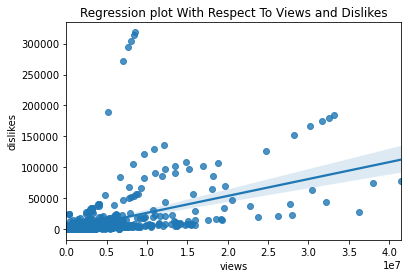

In [61]:
sns.regplot(data=videos,x='views',y='dislikes')
plt.title('Regression plot With Respect To Views and Dislikes')

#### Correlation matrix is the evidence of above analysis!

In [62]:
df_corr=videos[['views','likes','dislikes']]

In [63]:
df_corr.corr()

views     likes  dislikes
views     1.000000  0.832844  0.541955
likes     0.832844  1.000000  0.497439
dislikes  0.541955  0.497439  1.000000

<AxesSubplot:>

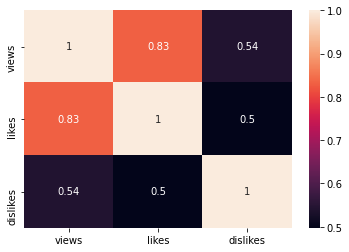

In [64]:
sns.heatmap(df_corr.corr(),annot=True)

# Analyzing Emojis in comments

In [65]:
comments.head(10)

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
5  jt2OHQh0HoQ  Keep calm and buy iphone 8 Keep calm and buy i...      0   
6  jt2OHQh0HoQ      i am a big fan of youtube and u !!!!!!!!!!!!!      0   
7  jt2OHQh0HoQ  You will never find Losers who line up and pay...      0   
8  jt2OHQh0HoQ  *APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...      0   
9  jt2OHQh0HoQ  I'm only here to see Emma, I love her so much!...      0   

   replies  polarity  
0        0  0.450000  
1        0  0.000000  
2        0  0.000000  
3        0  0.000000  
4        0  1.000000  
5        0  0.300000  
6        0  0.000000  
7        0 -0.100000  
8        0  0.028571  
9        0  0.500000

In [66]:
comments['comment_text'][1]

'To be there with a samsung phone\\n😂😂😂'

    Every emoji has a Unicode associated with it
     '\U0001F600' is a unicode for 😀

In [67]:
print('\U0001F600')

😀


In [68]:
!pip install emoji

In [69]:
import emoji

In [70]:
len(comments)

718424

In [71]:
comment=comments['comment_text'][1]

In [72]:
[c for c in comment if c in emoji.UNICODE_EMOJI]

[]

In [73]:
str=''
for i in comments['comment_text']:
    list=[c for c in i if c in emoji.UNICODE_EMOJI]
    for ele in list:
        str=str+ele

In [63]:
len(str)

341868

In [64]:
str

'😂😂😂😭😭😭😢😢😢❤❤😂👏👇👇👇👇👇👇👇👇👇👇🌞😎😣😥😫😭✌😂👎🏻👎🏻👎🏻👎🏻😂🖕😘😘▶⏭⏮◀🔥🔥😊😊🤔🤔😂😂😂😂👏🏻👏🏻❤❤😜😍😍😅❤😍😍✌😂😂😂😊😂😂😂😂😏😏🇪🇸😭💔😊❤❤❤❤❤😂😂😊❤😂🤣✨🌈😘😂😂❤😊😂😊😂💗😂😊😊😊💖🐢😉😍😂😂💗💗😻😻❤😂😂❤❤🤗👌🏼👌🏼😂😂😂😂💖😩🙊♥♥♥😂😂😂💙💙💙💙💙💙😂😂😂❤❤❤😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😱😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😂😊🤡🙏🙏🙏👊🏿🙇🏽👋😅😅😅😅😂😂🤔😎😎😎😎😎😎😎😍😍😍😍😍😍😘😘😘😘😘😘😘😲🖕💪🤘💓☺☺😂😂😂💕😄😄😍💕😉😩❤❤💕❤😂💕😍💗👫💖😆💕💖💕😍😍😊😄😍😀💗🦄😍😊😂😊👍😍♥❤😂👶🏻🤗☺😘💙💙💙😍😍😊😎🤘🖤👌👌😍😂👌🍍😎😎😄😄😄😄😂😂😂😬💜💜💜😭😂😍😍💖😂😂😂😂😂😂😂😭😂😭😂😭😂😂😂😍😍😍😭😍😍😂👀👀🤔😂😂😂😂😂😂😂😂😂😂🍸🍸🍸🍸🍸😂😂😂🤣🤣🤣😂😂😂😂😍💜💜💜💜😂😂😂😅😂😍💖😂😻😉🔥❤😻❤😭😭😭😭😭😭😭👍🏻😍💚💙❤❤😫❤❤❤❤❤♥😍❤😊😍😎💄🐐😅😂😂😊😊👀👌🏽❤❤❤😂💖🎉💪💪🏽😎🙌🙌😜❤❤💛💛😎🙏💚🎉🎉❤🎉🎉🎉🎉🎊🎉🎊🎉😭💗😍😍😍😍😍😍😍👏✌😁❤❤😂💋💋👫💘😻💋💋😂👑🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕❤😍🔥🔥🔥❤❤❤❤❤❤❤👌😍😍😍😞🌴💜💜💜💜😍😍😍😍😍❤❤❤❤❤😊❤❤❤❤🍔🍟🇺🇸😒🌿😄😄😄😉🍲🍱🎏❤💪👊🏽😘😂😂😂❤🙋☺😍😍😚💕😉😂❤❤😊☺💓🌸🙄🙄🙄🙁😞😊🙄😍😨😍😍😍😍😎😃😂😍😏😌😂😎🤑😂😉👍🏻🔥💯🚨😊☺😂😂😂🤣🙂❤❤😀😀😀♥♥😂❤😂😓😭😂❤❤😖😖😂😂😂💗💝😘💐💐💐😂😍☺😂❤😭💕🙌🏽🙌🏽🙌🏽😘😘❤❤💖😫😖📱😂😏🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😁🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😎😂😂👍🏼💯💕♥♥♥😱😱😱❤❤❤😍😍😩😩😩😩😩😩😩😍😻😻😻😻😻😳🥀♥♥♥♥♥♥😍😍😍🙃😂💕💕💕😍💕💕❤❤💕😍🍫🌹💖🇸🇸🇸🇸❤😍👸🏿👸🏿👸🏿👸🏿👸🏿💗😊😊😩❤👌🏼😻😊😍❤😂😂👏🏼❤❤❤❤❤😍😍😍💚💚💚💚💚😍😭🌹😍❤😍😍😍💚💚💚💚💚😍💚💚💚☺💙😀😍💚😕😍👌😂😂😂😍👌🏻💗❤💚💚💚😸😙😙😘💚💚💚💚😍😭😭💖💓💓💓😍❤😘😘🤗🤗🤗❤😀😀💓💓💓❤😂❤😍❤❤♥♥♥❤🙌❤😂❤❤😍❤💜😍😭😍😍😍😊💗💕😍❤💗💗💛💛💛💖💖😍😐😍😍😍😍🗿😂🤗😩😩😩💖💖💖❤❤❤❤❤😍😍✨😍👍🏻😁😂😍💅❤😘❤❤😈👀😄😈👍☝👆✊👌✌👊✋👋👏👐👉👈💔😂😂😬😭😥☺😂😂😂😂😍😍😍😜😂😂😂😂😂😒👎🏽😱😱😱😱😂😎😛🙊✊✌😑😑😑👌😊

    lets create a dictionary of having each emoji with its frequency as well

In [65]:
result={}
for i in set(str):
    result[i]=str.count(i)

In [66]:
result

{'👭': 75,
 '☁': 71,
 '🔨': 33,
 '🈸': 16,
 '⏸': 4,
 '🚧': 32,
 '📲': 17,
 '🔻': 23,
 '⚜': 27,
 '⏬': 6,
 '🌥': 6,
 '🔓': 17,
 '🥟': 1,
 '🎃': 715,
 '🔂': 5,
 '👽': 95,
 '↔': 5,
 '🔡': 5,
 '🙂': 528,
 '🍖': 43,
 '🤹': 1,
 '🎙': 16,
 '💽': 19,
 '🚜': 41,
 '🗞': 5,
 '🦆': 4,
 '🚢': 9,
 '🏵': 28,
 '⌨': 5,
 '🚼': 17,
 '⛑': 22,
 '🐘': 26,
 '🛩': 11,
 '🥛': 5,
 '🥂': 33,
 '🐩': 43,
 '🇭': 137,
 '🎬': 35,
 '♊': 9,
 '⚒': 5,
 '🕷': 99,
 '🏍': 8,
 '🦔': 2,
 '🍓': 240,
 '😺': 107,
 '❣': 647,
 '🕍': 6,
 '🐥': 117,
 '⏺': 5,
 '😙': 1139,
 '🏪': 7,
 '🍳': 38,
 '🔀': 6,
 '🆓': 8,
 '😆': 1423,
 '📛': 14,
 '🏔': 11,
 '🔧': 19,
 '⏹': 4,
 '🦊': 8,
 '☄': 23,
 '🙎': 12,
 '🌕': 34,
 '🤯': 3,
 '🌇': 11,
 '📎': 8,
 '🏈': 45,
 '🍬': 44,
 '🚻': 5,
 '⏭': 6,
 '🤞': 105,
 '🎵': 324,
 '👶': 164,
 '😵': 260,
 '👇': 297,
 '🚘': 10,
 '📍': 8,
 '🍕': 111,
 '🐆': 27,
 '👂': 23,
 '🚂': 11,
 '🇲': 270,
 '🍷': 58,
 '🍅': 30,
 '🍺': 48,
 '😦': 109,
 '☔': 25,
 '🤓': 187,
 '🐦': 223,
 '🛢': 4,
 '🤵': 4,
 '🚋': 7,
 '➿': 5,
 '👞': 34,
 '♾': 4,
 '🍴': 14,
 '🚛': 5,
 '🚠': 5,
 '🐔': 43,
 '🦖': 2,
 '🍏': 20,
 '🌪': 

    sort the emojis according to its count or frequency

In [67]:
result.items()

dict_items([('👭', 75), ('☁', 71), ('🔨', 33), ('🈸', 16), ('⏸', 4), ('🚧', 32), ('📲', 17), ('🔻', 23), ('⚜', 27), ('⏬', 6), ('🌥', 6), ('🔓', 17), ('🥟', 1), ('🎃', 715), ('🔂', 5), ('👽', 95), ('↔', 5), ('🔡', 5), ('🙂', 528), ('🍖', 43), ('🤹', 1), ('🎙', 16), ('💽', 19), ('🚜', 41), ('🗞', 5), ('🦆', 4), ('🚢', 9), ('🏵', 28), ('⌨', 5), ('🚼', 17), ('⛑', 22), ('🐘', 26), ('🛩', 11), ('🥛', 5), ('🥂', 33), ('🐩', 43), ('🇭', 137), ('🎬', 35), ('♊', 9), ('⚒', 5), ('🕷', 99), ('🏍', 8), ('🦔', 2), ('🍓', 240), ('😺', 107), ('❣', 647), ('🕍', 6), ('🐥', 117), ('⏺', 5), ('😙', 1139), ('🏪', 7), ('🍳', 38), ('🔀', 6), ('🆓', 8), ('😆', 1423), ('📛', 14), ('🏔', 11), ('🔧', 19), ('⏹', 4), ('🦊', 8), ('☄', 23), ('🙎', 12), ('🌕', 34), ('🤯', 3), ('🌇', 11), ('📎', 8), ('🏈', 45), ('🍬', 44), ('🚻', 5), ('⏭', 6), ('🤞', 105), ('🎵', 324), ('👶', 164), ('😵', 260), ('👇', 297), ('🚘', 10), ('📍', 8), ('🍕', 111), ('🐆', 27), ('👂', 23), ('🚂', 11), ('🇲', 270), ('🍷', 58), ('🍅', 30), ('🍺', 48), ('😦', 109), ('☔', 25), ('🤓', 187), ('🐦', 223), ('🛢', 4), ('🤵', 4

In [68]:
final={}
for key,value in sorted(result.items(),key =lambda item:item[1]):
    final[key]=value

In [69]:
final

{'🥟': 1,
 '🤹': 1,
 '🥨': 1,
 '🦓': 1,
 '🧣': 1,
 '🦏': 1,
 '🛷': 1,
 '🧠': 1,
 '🥌': 1,
 '🤺': 1,
 '🛒': 1,
 '🥡': 1,
 '🥜': 1,
 '🤽': 1,
 '🧤': 1,
 '🤾': 1,
 '🤟': 1,
 '🥚': 1,
 '🦔': 2,
 '🦖': 2,
 '🤱': 2,
 '🧛': 2,
 '🦕': 2,
 '🧡': 2,
 '🥅': 2,
 '🧢': 2,
 '🧒': 2,
 '🎌': 2,
 '🧘': 2,
 '🧝': 2,
 '🤯': 3,
 '🤫': 3,
 '🥖': 3,
 '🧐': 3,
 '🤨': 3,
 '🥄': 3,
 '⏸': 4,
 '🦆': 4,
 '⏹': 4,
 '🛢': 4,
 '🤵': 4,
 '♾': 4,
 '⚗': 4,
 '♟': 4,
 '🥞': 4,
 '🦐': 4,
 '🤬': 4,
 '☸': 4,
 '🛬': 4,
 '🖇': 4,
 '☦': 4,
 '🥈': 4,
 '🗓': 4,
 '💹': 4,
 '🗄': 4,
 '🗂': 4,
 '⏯': 4,
 '🏌': 4,
 '🦍': 4,
 '🧟': 4,
 '⚙': 4,
 '🥝': 4,
 '🛣': 4,
 '🖍': 4,
 '🏷': 4,
 '⏲': 4,
 '⏏': 4,
 '🔂': 5,
 '↔': 5,
 '🔡': 5,
 '🗞': 5,
 '⌨': 5,
 '🥛': 5,
 '⚒': 5,
 '⏺': 5,
 '🚻': 5,
 '➿': 5,
 '🚛': 5,
 '🚠': 5,
 '◽': 5,
 '🈲': 5,
 '🕎': 5,
 '🛋': 5,
 '🗳': 5,
 '🚁': 5,
 '🚟': 5,
 '🗜': 5,
 '⚾': 5,
 '🈵': 5,
 '🔚': 5,
 '◻': 5,
 '🆖': 5,
 '↩': 5,
 '☂': 5,
 '↪': 5,
 '↖': 5,
 '🔄': 5,
 '⛏': 5,
 '❎': 5,
 '🥉': 5,
 '🔲': 5,
 'ℹ': 5,
 '🔠': 5,
 '🚉': 5,
 '㊙': 5,
 '🎐': 5,
 '🤮': 5,
 '🖨': 5,
 '🔤': 5,
 '🗃': 5,
 '🔢': 5,
 

In [70]:
## convert dictionary into list for this we have to unzip this dictionary
keys=[*final.keys()]

In [71]:
keys

['🥟',
 '🤹',
 '🥨',
 '🦓',
 '🧣',
 '🦏',
 '🛷',
 '🧠',
 '🥌',
 '🤺',
 '🛒',
 '🥡',
 '🥜',
 '🤽',
 '🧤',
 '🤾',
 '🤟',
 '🥚',
 '🦔',
 '🦖',
 '🤱',
 '🧛',
 '🦕',
 '🧡',
 '🥅',
 '🧢',
 '🧒',
 '🎌',
 '🧘',
 '🧝',
 '🤯',
 '🤫',
 '🥖',
 '🧐',
 '🤨',
 '🥄',
 '⏸',
 '🦆',
 '⏹',
 '🛢',
 '🤵',
 '♾',
 '⚗',
 '♟',
 '🥞',
 '🦐',
 '🤬',
 '☸',
 '🛬',
 '🖇',
 '☦',
 '🥈',
 '🗓',
 '💹',
 '🗄',
 '🗂',
 '⏯',
 '🏌',
 '🦍',
 '🧟',
 '⚙',
 '🥝',
 '🛣',
 '🖍',
 '🏷',
 '⏲',
 '⏏',
 '🔂',
 '↔',
 '🔡',
 '🗞',
 '⌨',
 '🥛',
 '⚒',
 '⏺',
 '🚻',
 '➿',
 '🚛',
 '🚠',
 '◽',
 '🈲',
 '🕎',
 '🛋',
 '🗳',
 '🚁',
 '🚟',
 '🗜',
 '⚾',
 '🈵',
 '🔚',
 '◻',
 '🆖',
 '↩',
 '☂',
 '↪',
 '↖',
 '🔄',
 '⛏',
 '❎',
 '🥉',
 '🔲',
 'ℹ',
 '🔠',
 '🚉',
 '㊙',
 '🎐',
 '🤮',
 '🖨',
 '🔤',
 '🗃',
 '🔢',
 '🈯',
 '🈁',
 '⛸',
 '🖲',
 '🧜',
 '✡',
 '🌫',
 '🏮',
 '🖼',
 '🔼',
 '🈂',
 '🔁',
 '🧖',
 'Ⓜ',
 '🗒',
 '🈹',
 '🖊',
 '🈳',
 '♦',
 '🈴',
 '⛱',
 '🔳',
 '🚎',
 '🛂',
 '↕',
 '🕹',
 '⛴',
 '🔖',
 '🔃',
 '🔣',
 '🦒',
 '🛥',
 '🛤',
 '🆎',
 '🆔',
 '♠',
 '⏬',
 '🌥',
 '🕍',
 '🔀',
 '⏭',
 '🏓',
 '🚄',
 '⛹',
 '🏐',
 '🎑',
 '🏚',
 '📵',
 '🕴',
 '⏮',
 '🚺',
 '🛑',
 '🦇',
 '🚦',
 '🛃',
 '🚏'

In [72]:
values=[*final.values()]

In [73]:
values

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,


In [74]:
df=pd.DataFrame({'chars':keys[-20:],'num':values[-20:]})

In [75]:
df

chars    num
0      🙌   2734
1      🏼   2961
2      💙   2968
3      💗   3071
4      👌   3534
5      💜   3616
6      🏻   4412
7      💖   4809
8      😊   4946
9      👏   5357
10     😬   5489
11     👍   5817
12     😘   6334
13     💕   6531
14     ♥   7173
15     😭   9098
16     🔥  10249
17     😍  34856
18     ❤  36780
19     😂  43947